In [7]:
import numpy as np
import pandas as pd

In [8]:
data_dir = "."
model_label = "finnish_model_100_size"
from main import explain_using_raw_probs
indexed_Cs, zero_centered_Ps, id_to_morpho_tag, explanations, explanations_nparray_dict = \
            explain_using_raw_probs(model_label, data_dir)

In [9]:
indexed_Cs.keys()

dict_keys(['ORG', 'TIT', 'PER', 'TIM', 'LOC', 'DATE', 'PRO', 'MISC', 'EVENT', 'OUTSIDE'])

In [10]:

M = indexed_Cs['LOC'][0][0].shape[0]

In [11]:
indexed_Cs['LOC'].shape

(2040,)

In [12]:
indexed_Cs['LOC'][0].shape

(9, 89)

In [13]:
n_samples_0 = indexed_Cs['LOC'][0].shape[0]

In [14]:
indexed_Cs['LOC'][0][:3]

array([[ 1,  1,  1,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1,  1,  1,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, -1,  1,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0

In [15]:
zero_centered_Ps['LOC'][0]

[0.0,
 0.003384900000000024,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00011309999999997711,
 0.0,
 0.0]

In [16]:
import seaborn as sns

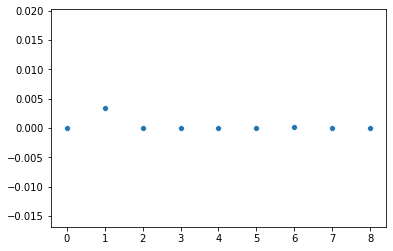

In [17]:
sns.scatterplot(range(n_samples_0), zero_centered_Ps['LOC'][0])

In [18]:
norm_explanations_nparray_dict = dict()
for entity_type in explanations_nparray_dict.keys():
    norm_explanations_nparray_dict[entity_type] = (explanations_nparray_dict[entity_type]-np.mean(explanations_nparray_dict[entity_type], axis=1, keepdims=True))/np.std(explanations_nparray_dict[entity_type], axis=1, keepdims=True)
    
concatenated_norm_explanations = None
norm_region_entity_types = []
for entity_type in norm_explanations_nparray_dict.keys():
    print(entity_type)
    norm_region_entity_types += [entity_type] * norm_explanations_nparray_dict[entity_type].shape[0]
    if concatenated_norm_explanations is None:
        concatenated_norm_explanations = norm_explanations_nparray_dict[entity_type]
    else:
        concatenated_norm_explanations = np.concatenate((concatenated_norm_explanations,
                                                         norm_explanations_nparray_dict[entity_type]),
                                                        axis=0)

concatenated_unnorm_explanations = None
unnorm_region_entity_types = []
for entity_type in explanations_nparray_dict.keys():
    print(entity_type)
    unnorm_region_entity_types += [entity_type] * explanations_nparray_dict[entity_type].shape[0]
    if concatenated_unnorm_explanations is None:
        concatenated_unnorm_explanations = explanations_nparray_dict[entity_type]
    else:
        concatenated_unnorm_explanations = np.concatenate((concatenated_unnorm_explanations,
                                                         explanations_nparray_dict[entity_type]),
                                                        axis=0)
                                                         
                                                         
                                                         
                                                         

ORG
TIT
PER
TIM
LOC
DATE
PRO
MISC
EVENT
OUTSIDE
ORG
TIT
PER
TIM
LOC
DATE
PRO
MISC
EVENT
OUTSIDE


In [19]:
def plot_single_case(entity_type, morpho_tag_id):
    single_case_X = concatenated_unnorm_explanations[:, morpho_tag_id].reshape([-1,1])
    single_case_y = np.array([int(x == entity_type) for x in unnorm_region_entity_types]).reshape([-1, 1])
    
    single_case_df = pd.DataFrame(np.concatenate((single_case_X, single_case_y), axis=1), columns=["X", "y"])
    
    sns.scatterplot(data=single_case_df, x="X", y="y", style="y", hue="y")

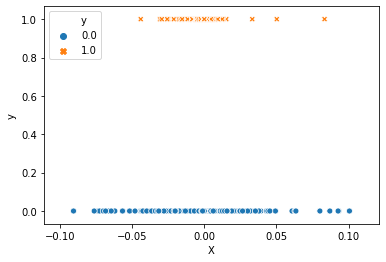

In [20]:
plot_single_case('LOC', 6)

In [21]:
[10**(i/10) for i in range(-10, 10)]


[0.1,
 0.12589254117941673,
 0.15848931924611134,
 0.19952623149688797,
 0.251188643150958,
 0.31622776601683794,
 0.3981071705534972,
 0.5011872336272722,
 0.6309573444801932,
 0.7943282347242815,
 1.0,
 1.2589254117941673,
 1.5848931924611136,
 1.9952623149688795,
 2.51188643150958,
 3.1622776601683795,
 3.9810717055349722,
 5.011872336272722,
 6.309573444801933,
 7.943282347242816]

In [22]:
import matplotlib.pyplot as plt


[25578 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578
 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578
 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578
 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578
 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578
 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578
 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578 25578
 25578 25578 25578 25578 25578]


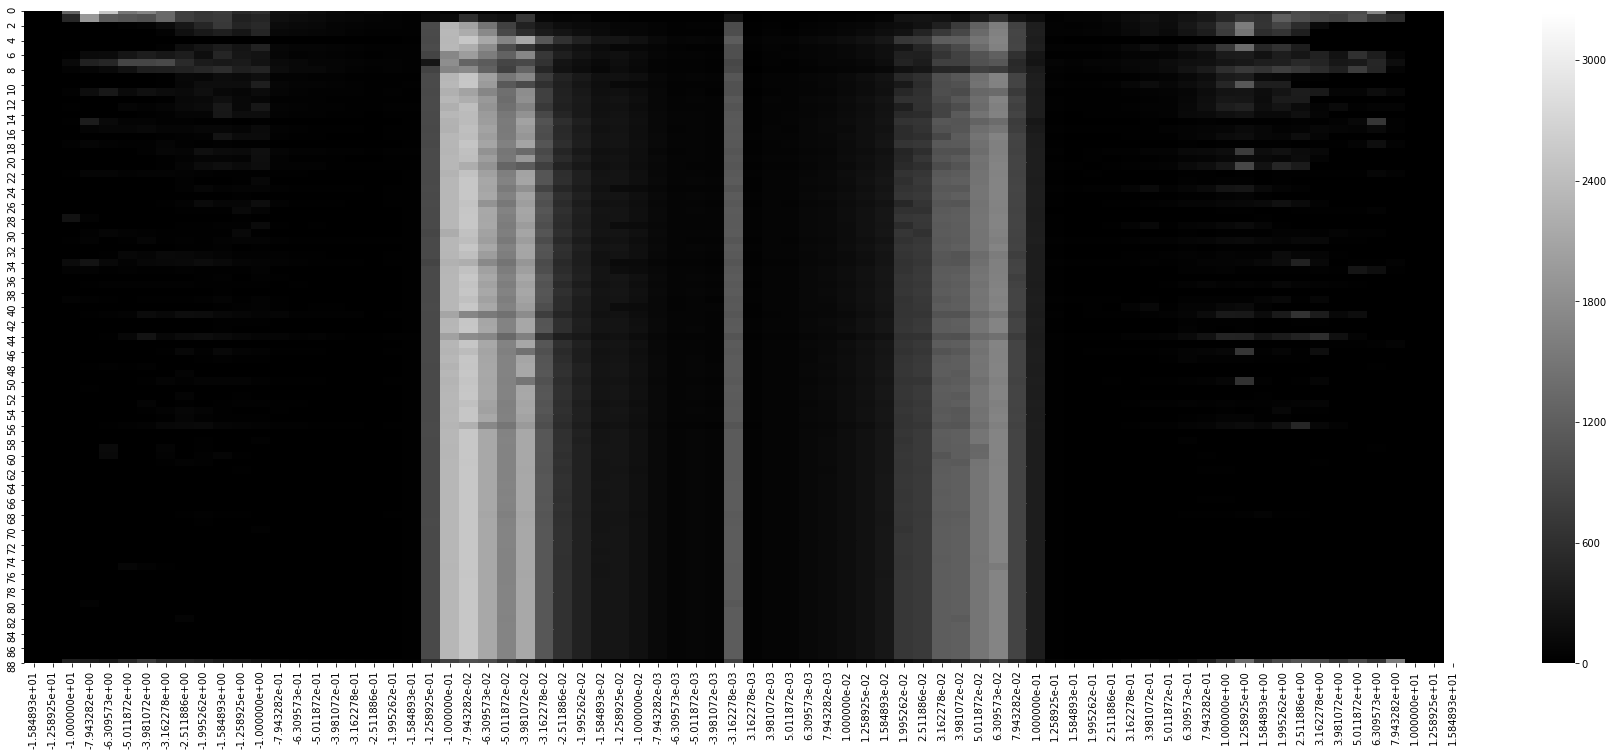

In [23]:

import numpy as np
import math
counts_morpho_tags_across_entity_tag = []
counts_morpho_tags_across_entity_tag_bins = list(np.array([-10**(i/10) for i in range(-25, 13)])[::-1]) + [10**(i/10) for i in range(-25, 13)]
for morpho_tag_id, morpho_tag in id_to_morpho_tag.items():
    single_case_X = concatenated_norm_explanations[:, morpho_tag_id].reshape([-1, 1])
    bins, edges = np.histogram(single_case_X, bins=counts_morpho_tags_across_entity_tag_bins)
    counts_morpho_tags_across_entity_tag.append(bins)
    # print(bins)
    # print(edges)
print(np.array(counts_morpho_tags_across_entity_tag).sum(axis=1))
fig = plt.figure(figsize=(32, 12))
fig.axes
sns.heatmap(counts_morpho_tags_across_entity_tag, 
            cmap="gray", 
            xticklabels=["%e" % (edge)
                         for edge in counts_morpho_tags_across_entity_tag_bins])


In [24]:
import pandas as pd
finnish_binary_classification_df = pd.read_csv("../../binary-classification-problems-for-ner-train-finnish_model_100_size.txt",
                                               sep="\t",
                                               header=None,
                                               names=["label"] + [id_to_morpho_tag[idx] for idx in range(len(id_to_morpho_tag))])

In [25]:
len(norm_explanations_nparray_dict.keys())

10

In [26]:
from collections import defaultdict

import scipy

counts_morpho_tags_across_entity_tag_edges = list(np.array([-10**(i/10) for i in range(-25, 13)])[::-1]) + [10**(i/10) for i in range(-25, 13)]

entropy_values_morpho_tags_across_entity_tag = defaultdict(list)
for entity_tag_idx, entity_tag in enumerate(norm_explanations_nparray_dict.keys()):
    for morpho_tag_id, morpho_tag in sorted(id_to_morpho_tag.items(), key=lambda x: x[0]):
        single_case_X = norm_explanations_nparray_dict[entity_tag][:, morpho_tag_id].reshape([-1, 1])
        bins, edges = np.histogram(single_case_X, bins=counts_morpho_tags_across_entity_tag_edges)
        entropy_values_morpho_tags_across_entity_tag[entity_tag] += [scipy.stats.entropy(bins)]


In [ ]:
entropy_values_morpho_tags_across_entity_tag

0 PER
[3.510881172674617, 2.8207190374498547, 2.9801911870756985, 3.491839293979875, 3.031800277309628, 3.0249459669906926, 3.6155051036955212, 3.159994369430125, 2.9950991298050615, 3.5040994927421023, 3.4542381215062434, 3.217235958995381, 3.0414425183026506, 2.989297050179215, 3.187104390677966, 2.984769738287222, 3.121226939075785, 3.3461979215340336, 3.0123702192281683, 2.9750359405968725, 2.9925166871585223, 3.0493106813836124, 2.9682856168858214, 3.06307272331611, 3.3895049745216683, 3.1469390371736194, 2.9684884280610624, 3.2075069355090644, 2.9937418765875075, 3.406121155692586, 2.971278365938553, 2.988680684718166, 3.302860868321626, 3.01135942996474, 3.3918678279718404, 3.0173440600712995, 2.9665529722948945, 3.601681003189947, 3.6193460545672878, 3.075621416982004, 3.0235181071561588, 3.0094200394682318, 3.000461286135846, 3.2757480064975297, 3.052772009288664, 3.0257226398092363, 2.9889288447975546, 2.9990439707414787, 3.3679536544894964, 3.0838214373119786, 3.133909261019

/Users/onur.gungor/.virtualenvs/dynet3/lib/python3.6/site-packages/ipykernel_launcher.py:131: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


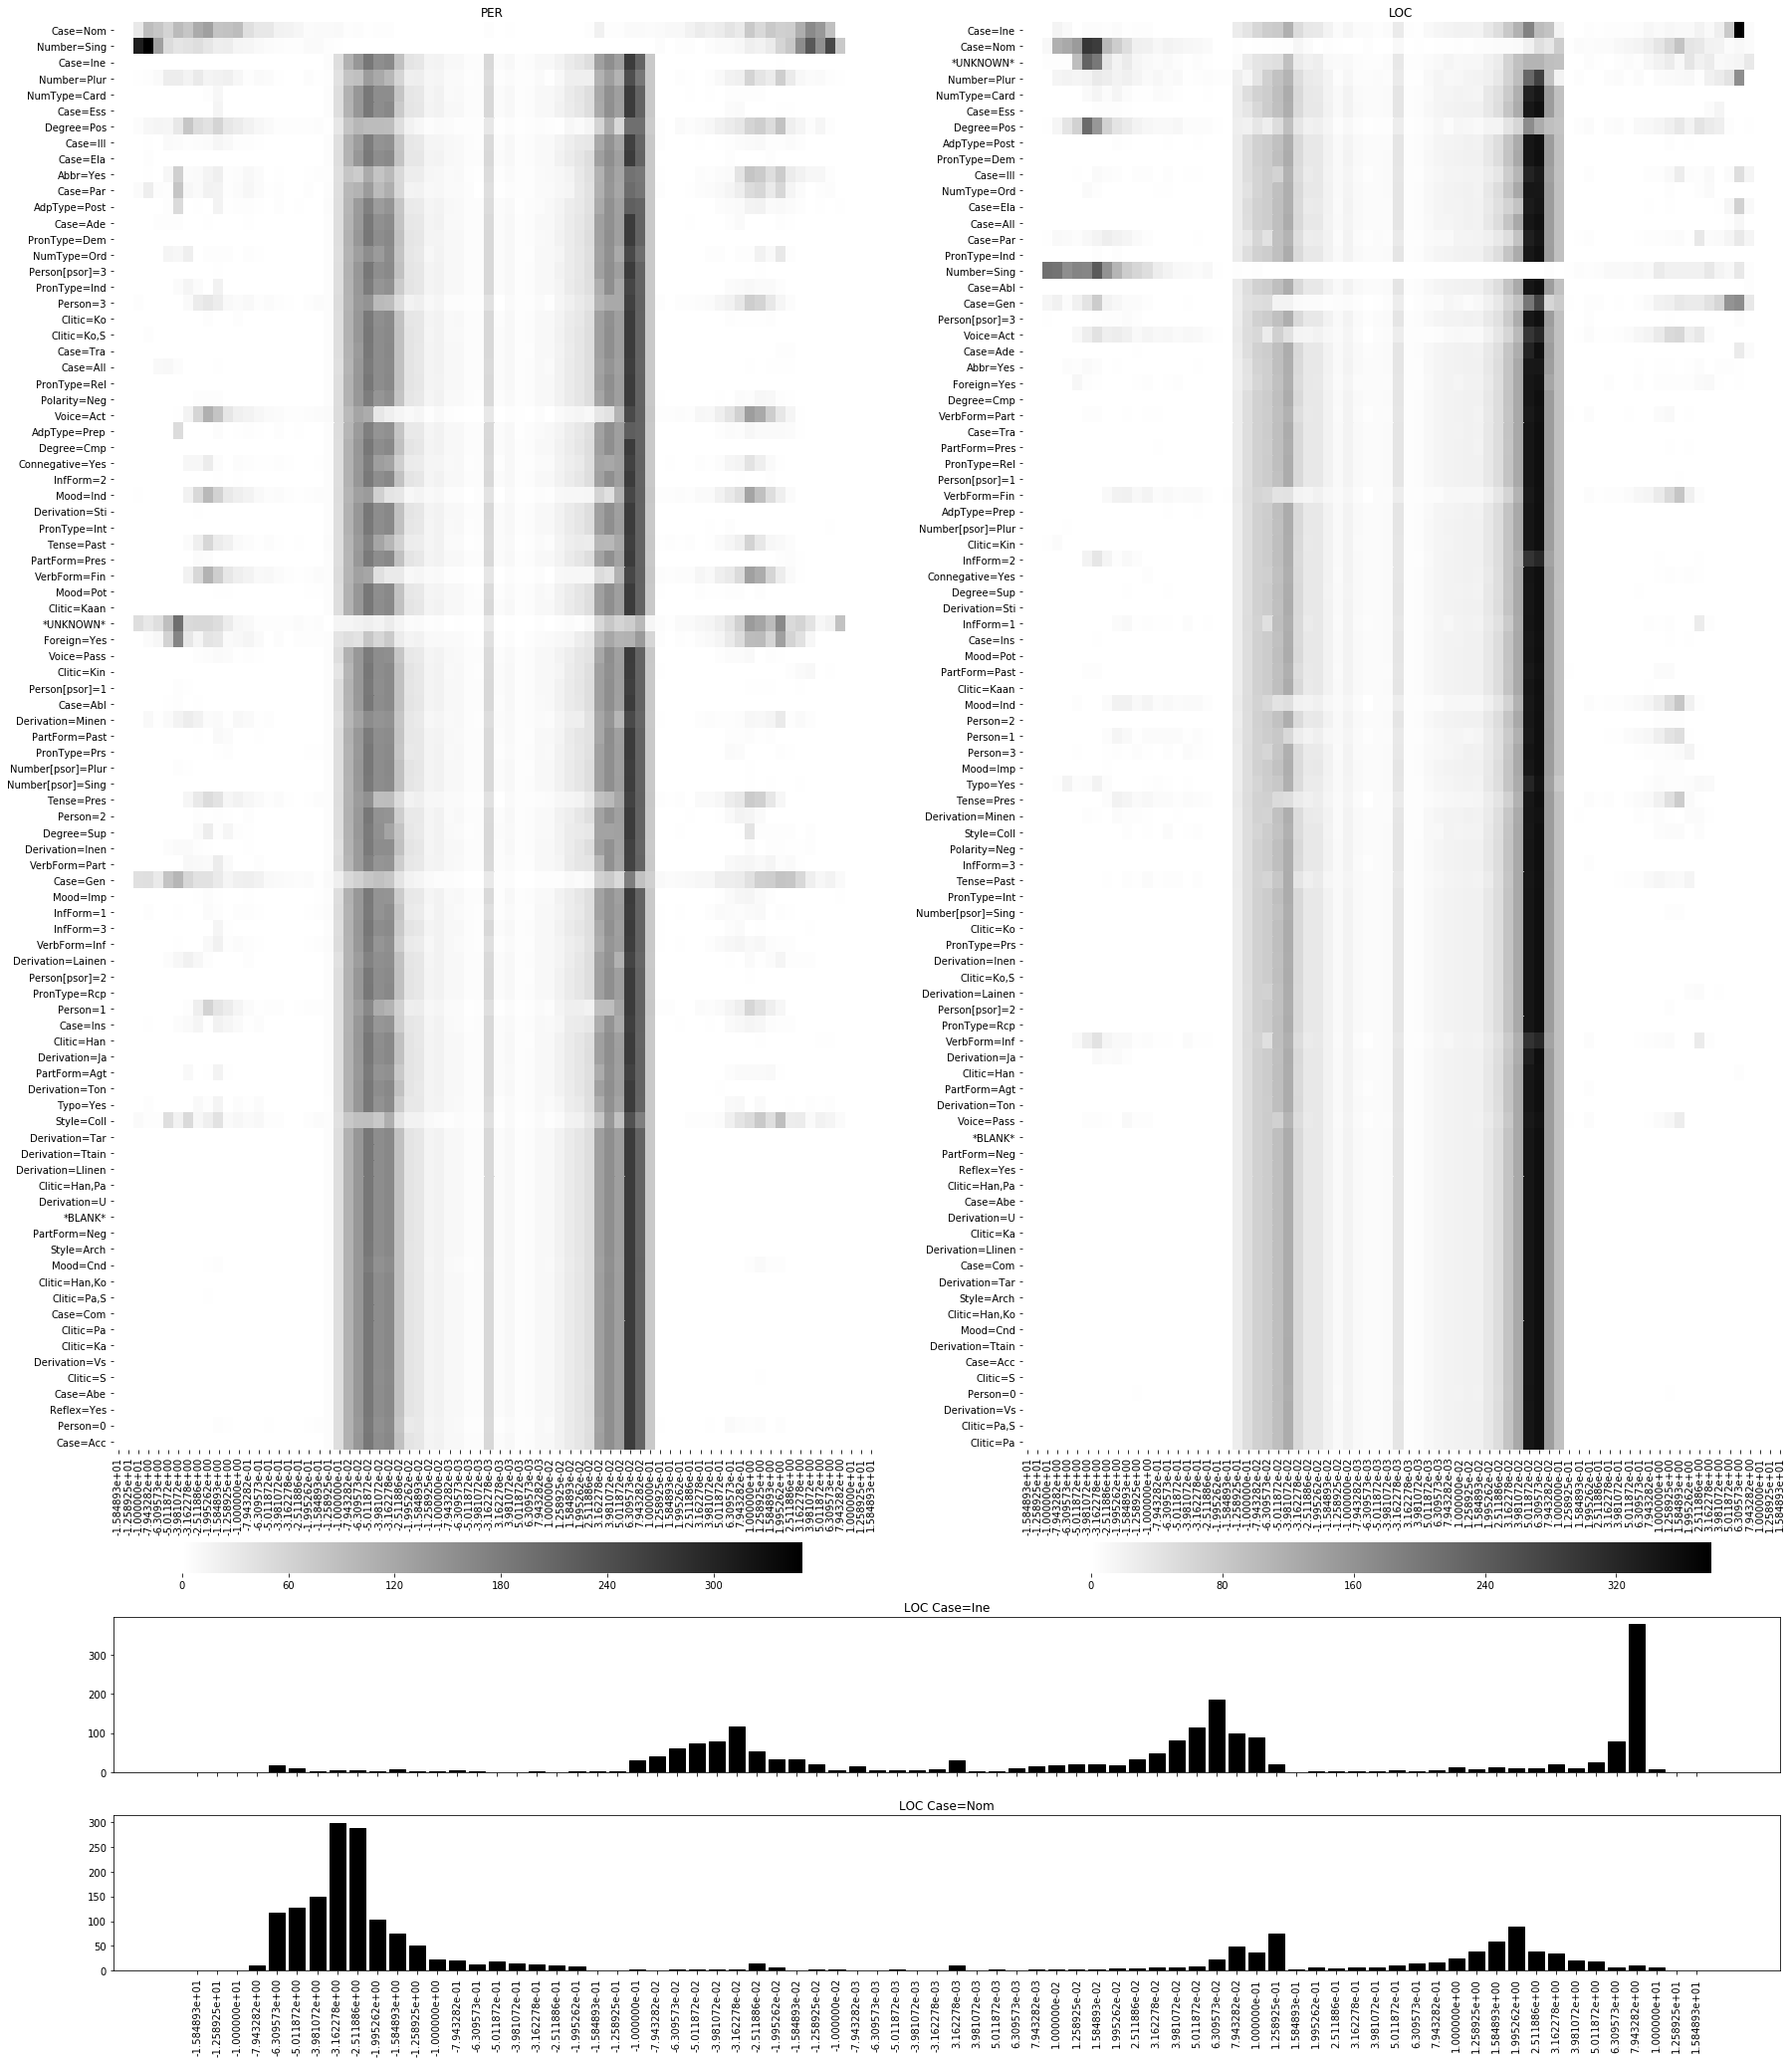

In [62]:

import matplotlib
import sklearn
import numpy as np
import math
from collections import defaultdict

counts_morpho_tags_across_entity_tag_edges = list(np.array([-10**(i/10) for i in range(-25, 13)])[::-1]) + [10**(i/10) for i in range(-25, 13)]

counts_morpho_tags_across_entity_tag = defaultdict(list)
mu_scores_morpho_tags_across_entity_tag = defaultdict(list)

for entity_tag_idx, entity_tag in enumerate(norm_explanations_nparray_dict.keys()):
    for morpho_tag_id, morpho_tag in sorted(id_to_morpho_tag.items(), key=lambda x: x[0]):
        
        mu_scores_morpho_tags_across_entity_tag[entity_tag] += [sklearn.metrics.mutual_info_score(finnish_binary_classification_df['label'] == entity_tag, 
                                                    finnish_binary_classification_df[morpho_tag])]
        entropy_values_morpho_tags_across_entity_tag[entity_tag] += [scipy.stats.entropy(bins)]
        
        single_case_X = norm_explanations_nparray_dict[entity_tag][:, morpho_tag_id].reshape([-1, 1])
        bins, edges = np.histogram(single_case_X, bins=counts_morpho_tags_across_entity_tag_edges)
        counts_morpho_tags_across_entity_tag[entity_tag].append(bins)
        # print(bins)
        # print(edges)
    # print(np.array(counts_morpho_tags_across_entity_tag[entity_tag]).sum(axis=1))
    # print(mu_scores_morpho_tags_across_entity_tag[entity_tag])

vmin_dict = dict()
vmax_dict = dict()
for entity_tag_idx, entity_tag in enumerate(norm_explanations_nparray_dict.keys()):
    vmin_dict[entity_tag] = np.min(counts_morpho_tags_across_entity_tag[entity_tag])
    vmax_dict[entity_tag] = np.max(counts_morpho_tags_across_entity_tag[entity_tag])
vmin_min = min([vmin_dict[entity_tag] for entity_tag in norm_explanations_nparray_dict.keys()])
vmax_max = max([vmax_dict[entity_tag] for entity_tag in norm_explanations_nparray_dict.keys()])

# fig = plt.figure(figsize=(8, 24))

# axes = []
# for row_idx in range(3):
#     for col_idx in range(4):
#         axes += [plt.subplot2grid((3, 4), (row_idx, col_idx))]
# cbar_ax = plt.subplot2grid((3, 4), (2, 1), colspan=2)
#axes += [cbar_ax]

# fig, axes = plt.subplots(
#         nrows=2, ncols=5, sharex=False, sharey=False, 
#         gridspec_kw={'height_ratios':[1,1], "hspace": 0.05},
#         figsize=(96, 72)
#         )

####
# fig, axes = plt.subplots(
#         nrows=1, ncols=2, sharex=False, sharey=False, 
#         gridspec_kw={'height_ratios':[1], "hspace": 0.05},
#         figsize=(24, 36)
#         )

fig = plt.figure(figsize=(30,36))
gs = matplotlib.gridspec.GridSpec(3, 2, height_ratios=[1.0,0.1,0.1], hspace=0.07)

# for ax in axes[2, 2:]:
#     ax.remove()

# last_row_first_column_gs = axes[3, 0].get_gridspec()
# # remove the underlying axes
# for ax in axes[3, 0:]:
#     ax.remove()
# cbar_ax = fig.add_subplot(last_row_first_column_gs[3, 0:])

# for entity_tag_idx, entity_tag in enumerate(norm_explanations_nparray_dict.keys()):
for entity_tag_idx, entity_tag in enumerate(["PER", "LOC"]):
    yticklabels = [id_to_morpho_tag[idx] for idx in range(len(id_to_morpho_tag))]
    sorted_indices = np.argsort(mu_scores_morpho_tags_across_entity_tag[entity_tag])[::-1]
    # ax = plt.subplot(4, 4, entity_tag_idx+1)
    ## ax = axes.ravel()[entity_tag_idx]
    ax = fig.add_subplot(gs[0, entity_tag_idx])
    ax.set_title("%s" % entity_tag)

    print(entity_tag_idx, entity_tag)
    print([entropy_values_morpho_tags_across_entity_tag[entity_tag][idx] for idx in sorted_indices])

#     if entity_tag_idx == len(norm_explanations_nparray_dict.keys())-1:
#         draw_cbar = True

#         sns.heatmap([counts_morpho_tags_across_entity_tag[entity_tag][idx] for idx in sorted_indices], 
#                     cmap="gray", 
#                     xticklabels=["%e" % (edge)
#                                  for edge in counts_morpho_tags_across_entity_tag_edges],
#                     yticklabels=[yticklabels[idx] for idx in sorted_indices],
#                     ax=ax,
#                     vmin=vmin_dict[entity_tag],
#                     vmax=vmax_dict[entity_tag],
#                     cbar=draw_cbar,
#                     cbar_ax=cbar_ax,
#                     cbar_kws={"orientation": "horizontal"}
#                     )
#     else:
    sns.heatmap([counts_morpho_tags_across_entity_tag[entity_tag][idx] for idx in sorted_indices], 
                cmap="gray_r", 
                xticklabels=["%e" % (edge)
                             for edge in counts_morpho_tags_across_entity_tag_edges],
                yticklabels=[yticklabels[idx] for idx in sorted_indices],
                ax=ax,
                vmin=vmin_dict[entity_tag],
                vmax=vmax_dict[entity_tag],
                cbar=True,
                cbar_kws={"orientation": "horizontal", "pad": 0.06, "fraction": 0.02}
                )
    
morpho_tag_to_id = {morpho_tag: idx for idx, morpho_tag in id_to_morpho_tag.items()}

print(len(counts_morpho_tags_across_entity_tag_edges))
print(len(counts_morpho_tags_across_entity_tag["LOC"][morpho_tag_to_id["Case=Ine"]]))
for morpho_tag_idx, morpho_tag in enumerate(["Case=Ine", "Case=Nom"]):
    ax = fig.add_subplot(gs[1+morpho_tag_idx, :])
    ax.bar(list(range(len(counts_morpho_tags_across_entity_tag_edges))),
          [0]+list(counts_morpho_tags_across_entity_tag["LOC"][morpho_tag_to_id[morpho_tag]]),
          color="black",
          edgecolor="black")
    ax.set_xticks(list(range(len(counts_morpho_tags_across_entity_tag_edges))))
    if morpho_tag_idx == 1:
        ax.set_xticklabels(["%e" % (edge) for edge in counts_morpho_tags_across_entity_tag_edges],
                  rotation=90)
    else:
        ax.set_xticklabels(["" for edge in counts_morpho_tags_across_entity_tag_edges])
    ax.set_title("LOC " + morpho_tag)

# xticklabels=["%e" % (edge)
#                              for edge in counts_morpho_tags_across_entity_tag_edges]

fig.show()
fig.savefig("morpho_tag_column_histograms_for_each_entity_tag_finnish-3x2-PER-LOC.eps", bbox_inches='tight')


In [52]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'patch.force_edgecolor': False,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

0 PER
[3.510881172674617, 2.8207190374498547, 2.9801911870756985, 3.491839293979875, 3.031800277309628, 3.0249459669906926, 3.6155051036955212, 3.159994369430125, 2.9950991298050615, 3.5040994927421023, 3.4542381215062434, 3.217235958995381, 3.0414425183026506, 2.989297050179215, 3.187104390677966, 2.984769738287222, 3.121226939075785, 3.3461979215340336, 3.0123702192281683, 2.9750359405968725, 2.9925166871585223, 3.0493106813836124, 2.9682856168858214, 3.06307272331611, 3.3895049745216683, 3.1469390371736194, 2.9684884280610624, 3.2075069355090644, 2.9937418765875075, 3.406121155692586, 2.971278365938553, 2.988680684718166, 3.302860868321626, 3.01135942996474, 3.3918678279718404, 3.0173440600712995, 2.9665529722948945, 3.601681003189947, 3.6193460545672878, 3.075621416982004, 3.0235181071561588, 3.0094200394682318, 3.000461286135846, 3.2757480064975297, 3.052772009288664, 3.0257226398092363, 2.9889288447975546, 2.9990439707414787, 3.3679536544894964, 3.0838214373119786, 3.133909261019

/Users/onur.gungor/.virtualenvs/dynet3/lib/python3.6/site-packages/ipykernel_launcher.py:112: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


1 LOC
[3.3025005920827426, 3.241658075755551, 3.528743229039676, 3.4451802138686998, 3.026805082073947, 2.955247684188127, 3.5742142968476593, 2.9341604937838115, 2.889179962852065, 3.1265099333391664, 2.9617709294102728, 2.996036428924427, 2.905501762488377, 3.2054781318597048, 2.9199583955609896, 2.966397500163693, 2.8986958842500266, 3.381574403480395, 2.9715889019625905, 3.339636894128696, 2.954195367752385, 2.989245024158656, 3.0306237254035375, 2.8867122042317703, 2.9654565498802894, 2.892855123301971, 2.9069641977094527, 2.891389143333743, 2.8988535851241446, 3.1744069568041873, 2.9013957674145443, 2.8913147168164697, 2.900519624380741, 3.0855844396122354, 2.93346661127294, 2.918854648752127, 2.889432103824256, 3.0015377190546113, 2.911485541877946, 2.888938147523525, 2.943762454887427, 2.890440838832867, 3.1700777761627386, 2.923881291601731, 3.1064851218131357, 3.004148216368815, 2.928279981674724, 3.0822434716603926, 3.13435137182521, 2.9909793246299574, 2.9753437602912367, 2

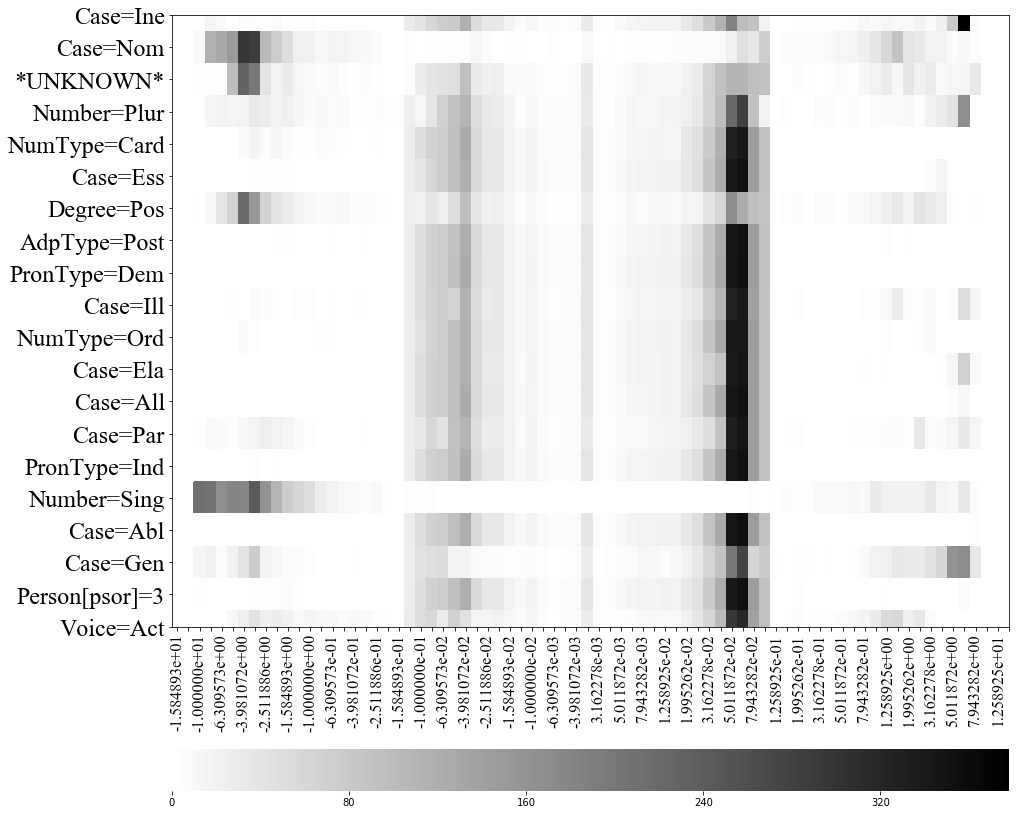

In [53]:
# FOR TOP FIGURE
import matplotlib
import sklearn
import numpy as np
import math
from collections import defaultdict

counts_morpho_tags_across_entity_tag_edges = list(np.array([-10**(i/10) for i in range(-25, 13)])[::-1]) + [10**(i/10) for i in range(-25, 13)]

counts_morpho_tags_across_entity_tag = defaultdict(list)
mu_scores_morpho_tags_across_entity_tag = defaultdict(list)

for entity_tag_idx, entity_tag in enumerate(norm_explanations_nparray_dict.keys()):
    for morpho_tag_id, morpho_tag in sorted(id_to_morpho_tag.items(), key=lambda x: x[0]):
        
        mu_scores_morpho_tags_across_entity_tag[entity_tag] += [sklearn.metrics.mutual_info_score(finnish_binary_classification_df['label'] == entity_tag, 
                                                    finnish_binary_classification_df[morpho_tag])]
        entropy_values_morpho_tags_across_entity_tag[entity_tag] += [scipy.stats.entropy(bins)]
        
        single_case_X = norm_explanations_nparray_dict[entity_tag][:, morpho_tag_id].reshape([-1, 1])
        bins, edges = np.histogram(single_case_X, bins=counts_morpho_tags_across_entity_tag_edges)
        counts_morpho_tags_across_entity_tag[entity_tag].append(bins)
        # print(bins)
        # print(edges)
    # print(np.array(counts_morpho_tags_across_entity_tag[entity_tag]).sum(axis=1))
    # print(mu_scores_morpho_tags_across_entity_tag[entity_tag])

vmin_dict = dict()
vmax_dict = dict()
for entity_tag_idx, entity_tag in enumerate(norm_explanations_nparray_dict.keys()):
    vmin_dict[entity_tag] = np.min(counts_morpho_tags_across_entity_tag[entity_tag])
    vmax_dict[entity_tag] = np.max(counts_morpho_tags_across_entity_tag[entity_tag])
vmin_min = min([vmin_dict[entity_tag] for entity_tag in norm_explanations_nparray_dict.keys()])
vmax_max = max([vmax_dict[entity_tag] for entity_tag in norm_explanations_nparray_dict.keys()])

# fig = plt.figure(figsize=(8, 24))

# axes = []
# for row_idx in range(3):
#     for col_idx in range(4):
#         axes += [plt.subplot2grid((3, 4), (row_idx, col_idx))]
# cbar_ax = plt.subplot2grid((3, 4), (2, 1), colspan=2)
#axes += [cbar_ax]

# fig, axes = plt.subplots(
#         nrows=2, ncols=5, sharex=False, sharey=False, 
#         gridspec_kw={'height_ratios':[1,1], "hspace": 0.05},
#         figsize=(96, 72)
#         )

####
# fig, axes = plt.subplots(
#         nrows=1, ncols=2, sharex=False, sharey=False, 
#         gridspec_kw={'height_ratios':[1], "hspace": 0.05},
#         figsize=(24, 36)
#         )

fig = plt.figure(figsize=(15,15))
# gs = matplotlib.gridspec.GridSpec(3, 2, height_ratios=[1.0,0.1,0.1], hspace=0.07)

# for ax in axes[2, 2:]:
#     ax.remove()

# last_row_first_column_gs = axes[3, 0].get_gridspec()
# # remove the underlying axes
# for ax in axes[3, 0:]:
#     ax.remove()
# cbar_ax = fig.add_subplot(last_row_first_column_gs[3, 0:])

# del matplotlib.font_manager.weight_dict['roman']
# matplotlib.font_manager._rebuild()

# for entity_tag_idx, entity_tag in enumerate(norm_explanations_nparray_dict.keys()):
for entity_tag_idx, entity_tag in enumerate(["PER", "LOC"]):
    plt.clf()
    yticklabels = [id_to_morpho_tag[idx] for idx in range(len(id_to_morpho_tag))]
    sorted_indices = np.argsort(mu_scores_morpho_tags_across_entity_tag[entity_tag])[::-1]
    # ax = plt.subplot(4, 4, entity_tag_idx+1)
    ## ax = axes.ravel()[entity_tag_idx]
    # ax = fig.add_subplot(gs[0, entity_tag_idx])
    # plt.title("%s" % entity_tag)

    print(entity_tag_idx, entity_tag)
    print([entropy_values_morpho_tags_across_entity_tag[entity_tag][idx] for idx in sorted_indices])
    
    first_n = 20

    b = sns.heatmap([counts_morpho_tags_across_entity_tag[entity_tag][idx] for idx in sorted_indices[:first_n]], 
                cmap="gray_r", 
                xticklabels=[(("%e" % (edge)) if (idx % 2 == 0) else "") 
                             for idx, edge in enumerate(counts_morpho_tags_across_entity_tag_edges)],
                yticklabels=[yticklabels[idx] for idx in sorted_indices[:first_n]],
                #ax=ax,
                vmin=vmin_dict[entity_tag],
                vmax=vmax_dict[entity_tag],
                cbar=True,
                cbar_kws={"orientation": "horizontal", "pad": 0.15, "fraction": 0.1}
                )
    for _, spine in b.axes.spines.items():
        spine.set_visible(True)
    # fontname="Times New Roman"
    # fontfamily="serif"
    # b.axes.set_title("%s" % entity_tag, fontname="Times New Roman", fontsize=48, fontweight="normal")
    for tick in b.axes.get_xticklabels():
        tick.set_fontname("Times New Roman")
        tick.set_fontweight("normal")
        tick.set_fontsize(16)
    for tick in b.axes.get_yticklabels():
        tick.set_fontname("Times New Roman")
        tick.set_fontweight("normal")
        tick.set_fontsize(24)
    fig.show()
    fig.savefig("morpho_tag_column_histograms_for_each_entity_tag_finnish-TOP_FIGURE-%s.eps" % entity_tag, 
                bbox_inches='tight')
    


76
75


/Users/onur.gungor/.virtualenvs/dynet3/lib/python3.6/site-packages/ipykernel_launcher.py:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


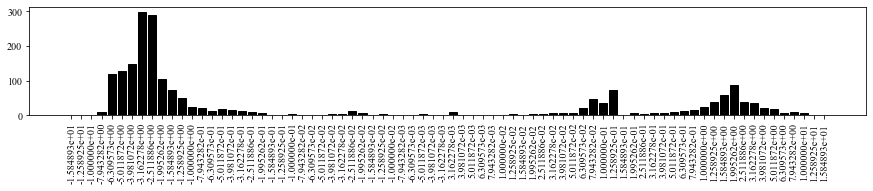

In [42]:
# FOR BOTTOM ROWS

import matplotlib
import sklearn
import numpy as np
import math
from collections import defaultdict

counts_morpho_tags_across_entity_tag_edges = list(np.array([-10**(i/10) for i in range(-25, 13)])[::-1]) + \
                                            [10**(i/10) for i in range(-25, 13)]

counts_morpho_tags_across_entity_tag = defaultdict(list)
mu_scores_morpho_tags_across_entity_tag = defaultdict(list)

for entity_tag_idx, entity_tag in enumerate(norm_explanations_nparray_dict.keys()):
    for morpho_tag_id, morpho_tag in sorted(id_to_morpho_tag.items(), key=lambda x: x[0]):
        
        mu_scores_morpho_tags_across_entity_tag[entity_tag] += [sklearn.metrics.mutual_info_score(finnish_binary_classification_df['label'] == entity_tag, 
                                                    finnish_binary_classification_df[morpho_tag])]
        entropy_values_morpho_tags_across_entity_tag[entity_tag] += [scipy.stats.entropy(bins)]
        
        single_case_X = norm_explanations_nparray_dict[entity_tag][:, morpho_tag_id].reshape([-1, 1])
        bins, edges = np.histogram(single_case_X, bins=counts_morpho_tags_across_entity_tag_edges)
        counts_morpho_tags_across_entity_tag[entity_tag].append(bins)
        # print(bins)
        # print(edges)
    # print(np.array(counts_morpho_tags_across_entity_tag[entity_tag]).sum(axis=1))
    # print(mu_scores_morpho_tags_across_entity_tag[entity_tag])

vmin_dict = dict()
vmax_dict = dict()
for entity_tag_idx, entity_tag in enumerate(norm_explanations_nparray_dict.keys()):
    vmin_dict[entity_tag] = np.min(counts_morpho_tags_across_entity_tag[entity_tag])
    vmax_dict[entity_tag] = np.max(counts_morpho_tags_across_entity_tag[entity_tag])
vmin_min = min([vmin_dict[entity_tag] for entity_tag in norm_explanations_nparray_dict.keys()])
vmax_max = max([vmax_dict[entity_tag] for entity_tag in norm_explanations_nparray_dict.keys()])

fig = plt.figure(figsize=(15,2))
    
morpho_tag_to_id = {morpho_tag: idx for idx, morpho_tag in id_to_morpho_tag.items()}

print(len(counts_morpho_tags_across_entity_tag_edges))
print(len(counts_morpho_tags_across_entity_tag["LOC"][morpho_tag_to_id["Case=Ine"]]))
for morpho_tag_idx, morpho_tag in enumerate(["Case=Ine", "Case=Nom"]):
    plt.clf()
    # ax = fig.add_subplot(gs[1+morpho_tag_idx, :])
    ax = plt.axes()
    ax.bar(list(range(len(counts_morpho_tags_across_entity_tag_edges))),
          [0]+list(counts_morpho_tags_across_entity_tag["LOC"][morpho_tag_to_id[morpho_tag]]),
          color="black",
          edgecolor="black")
    ax.set_xticks(list(range(len(counts_morpho_tags_across_entity_tag_edges))))
    if morpho_tag_idx == 1:
        ax.set_xticklabels(["%e" % (edge) for edge in counts_morpho_tags_across_entity_tag_edges],
                  rotation=90)
    else:
        ax.set_xticklabels(["" for edge in counts_morpho_tags_across_entity_tag_edges])
    # ax.set_title("Entity Type: LOC | Morpho. Tag: " + morpho_tag + " | Row: %d" % (morpho_tag_idx+1),
    #             fontname="Times New Roman",
    #             fontsize=24)
    
    for tick in ax.get_xticklabels():
        tick.set_fontname("Times New Roman")
        tick.set_fontweight("normal")
    for tick in ax.get_yticklabels():
        tick.set_fontname("Times New Roman")
        tick.set_fontweight("normal")

# xticklabels=["%e" % (edge)
#                              for edge in counts_morpho_tags_across_entity_tag_edges]

    fig.show()
    fig.savefig("morpho_tag_column_histograms_for_each_entity_tag_finnish-BOTTOM_ROWS-LOC-%s.eps" % morpho_tag, 
                bbox_inches='tight')


In [44]:
counts_morpho_tags_across_entity_tag_edges

[-15.848931924611133,
 -12.589254117941675,
 -10.0,
 -7.943282347242816,
 -6.309573444801933,
 -5.011872336272722,
 -3.9810717055349722,
 -3.1622776601683795,
 -2.51188643150958,
 -1.9952623149688795,
 -1.5848931924611136,
 -1.2589254117941673,
 -1.0,
 -0.7943282347242815,
 -0.6309573444801932,
 -0.5011872336272722,
 -0.3981071705534972,
 -0.31622776601683794,
 -0.251188643150958,
 -0.19952623149688797,
 -0.15848931924611134,
 -0.12589254117941673,
 -0.1,
 -0.07943282347242814,
 -0.06309573444801933,
 -0.05011872336272722,
 -0.039810717055349734,
 -0.03162277660168379,
 -0.025118864315095794,
 -0.0199526231496888,
 -0.015848931924611134,
 -0.012589254117941675,
 -0.01,
 -0.007943282347242814,
 -0.00630957344480193,
 -0.005011872336272725,
 -0.003981071705534973,
 -0.0031622776601683794,
 0.0031622776601683794,
 0.003981071705534973,
 0.005011872336272725,
 0.00630957344480193,
 0.007943282347242814,
 0.01,
 0.012589254117941675,
 0.015848931924611134,
 0.0199526231496888,
 0.0251188643

0 PER
1 MISC


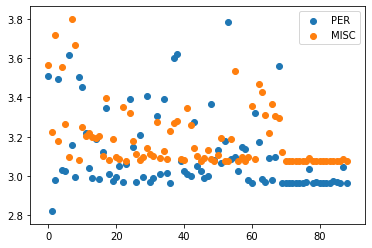

In [36]:
for entity_tag_idx, entity_tag in enumerate(["PER", "MISC"]):
    yticklabels = [id_to_morpho_tag[idx] for idx in range(len(id_to_morpho_tag))]
    sorted_indices = np.argsort(mu_scores_morpho_tags_across_entity_tag[entity_tag])[::-1]
    # ax = plt.subplot(4, 4, entity_tag_idx+1)
    ax = axes.ravel()[entity_tag_idx]
    ax.set_title("%s - explanations across morpho. tag columns" % entity_tag)

    print(entity_tag_idx, entity_tag)
    plt.scatter(list(range(len(id_to_morpho_tag))), 
              [entropy_values_morpho_tags_across_entity_tag[entity_tag][idx] for idx in sorted_indices])
plt.legend(["PER", "MISC"])


In [56]:
for entity_tag in norm_explanations_nparray_dict.keys():
    print(len(norm_explanations_nparray_dict[entity_tag][0]))

89
89
89
89
89
89
89
89
89
89


In [17]:
np.array(counts_morpho_tags_across_entity_tag).shape

(89, 100)

In [18]:
import sklearn
from sklearn.cluster import SpectralClustering, MiniBatchKMeans
from collections import defaultdict
spectral_cmodels_over_morpho_tag_histograms = SpectralClustering(n_clusters=10,
                                                                 eigen_solver="arpack", 
                                                                 assign_labels="discretize", 
                                                                 affinity="nearest_neighbors",
                                                                 n_jobs=4)
spectral_cmodels_over_morpho_tag_histograms.fit(np.array(counts_morpho_tags_across_entity_tag))

SpectralClustering(affinity='nearest_neighbors', assign_labels='discretize',
                   coef0=1, degree=3, eigen_solver='arpack', eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=10, n_init=10,
                   n_jobs=4, n_neighbors=10, random_state=None)

In [19]:
spectral_cmodels_over_morpho_tag_histograms.labels_

array([5, 5, 5, 5, 4, 5, 8, 5, 5, 3, 2, 8, 8, 8, 3, 9, 9, 3, 9, 2, 3, 2,
       9, 0, 3, 6, 8, 6, 0, 3, 6, 9, 6, 9, 8, 3, 1, 9, 1, 9, 3, 8, 6, 0,
       8, 6, 2, 0, 1, 7, 2, 1, 7, 9, 9, 7, 8, 1, 0, 1, 1, 1, 0, 1, 4, 1,
       1, 1, 6, 1, 4, 4, 4, 1, 1, 1, 1, 1, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4,
       5])

In [20]:
sorted([(label, id_to_morpho_tag[idx]) for idx, label in enumerate(spectral_cmodels_over_morpho_tag_histograms.labels_)],
       key=lambda x: x[0])

[(0, 'Person=0'),
 (0, 'PronType=Dem'),
 (0, 'InfForm=3'),
 (0, 'PartForm=Agt'),
 (0, 'Clitic=Kaan'),
 (0, 'PronType=Int'),
 (1, 'Case=Tra'),
 (1, 'Mood=Cnd'),
 (1, 'Case=Abl'),
 (1, 'PronType=Rel'),
 (1, 'Clitic=Ko'),
 (1, 'Degree=Cmp'),
 (1, 'Derivation=Sti'),
 (1, 'Derivation=Inen'),
 (1, 'Number[psor]=Plur'),
 (1, 'Person[psor]=2'),
 (1, 'Clitic=Han'),
 (1, 'Clitic=S'),
 (1, 'Case=Abe'),
 (1, 'PronType=Rcp'),
 (1, 'Derivation=Ja'),
 (1, 'Derivation=Vs'),
 (1, 'Derivation=Ton'),
 (1, 'Clitic=Ko,S'),
 (2, 'Tense=Pres'),
 (2, 'VerbForm=Inf'),
 (2, 'Person=1'),
 (2, 'Case=Ins'),
 (2, 'InfForm=2'),
 (3, 'Person=3'),
 (3, 'VerbForm=Part'),
 (3, 'PartForm=Past'),
 (3, 'Voice=Pass'),
 (3, 'Connegative=Yes'),
 (3, 'Person=2'),
 (3, 'Case=Ess'),
 (3, 'Mood=Imp'),
 (4, '*BLANK*'),
 (4, 'Clitic=Ka'),
 (4, 'Reflex=Yes'),
 (4, 'Case=Acc'),
 (4, 'Clitic=Pa'),
 (4, 'Clitic=Pa,S'),
 (4, 'Case=Com'),
 (4, 'Derivation=Ttain'),
 (4, 'Clitic=Han,Ko'),
 (4, 'PartForm=Neg'),
 (4, 'Derivation=U'),
 (4, 'C

In [21]:
# clustering over histograms of all morpho tags of each specific entity_tag
# boyle yazdim ama bunu yapmamisim :)

import sklearn
from sklearn.cluster import SpectralClustering, MiniBatchKMeans
from collections import defaultdict

spectral_cmodels_over_histograms_of_all_morpho_tags = {entity_tag: dict() for entity_tag in norm_explanations_nparray_dict.keys()}

mis_scores = defaultdict(list)

for entity_tag in norm_explanations_nparray_dict.keys():      

    spectral_cmodels_over_histograms_of_all_morpho_tags[entity_tag] = SpectralClustering(n_clusters=2,
                                                                 eigen_solver="arpack", 
                                                                 assign_labels="discretize", 
                                                                 affinity="nearest_neighbors",
                                                                n_jobs=4)
    #     spectral_cmodels_over_histograms_of_all_morpho_tags[entity_tag][morpho_tag] = MiniBatchKMeans(n_clusters=2, verbose=0)
    spectral_cmodels_over_histograms_of_all_morpho_tags[entity_tag].fit(norm_explanations_nparray_dict[entity_tag].T)
    
    print(("ENDED", entity_tag))
        


('ENDED', 'ORG')
('ENDED', 'TIT')
('ENDED', 'PER')
('ENDED', 'TIM')
('ENDED', 'LOC')
('ENDED', 'DATE')
('ENDED', 'PRO')
('ENDED', 'MISC')
('ENDED', 'EVENT')
('ENDED', 'OUTSIDE')


In [22]:
norm_explanations_nparray_dict[entity_tag].shape

(5, 89)

In [23]:
spectral_cmodels_over_histograms_of_all_morpho_tags['LOC'].labels_

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [24]:
sorted([(label, id_to_morpho_tag[idx]) 
        for idx, label in enumerate(spectral_cmodels_over_histograms_of_all_morpho_tags['TIT'].labels_)],
       key=lambda x: x[0])


[(0, 'Number=Sing'),
 (0, 'Case=Nom'),
 (0, '*BLANK*'),
 (0, 'Number=Plur'),
 (0, 'Case=Gen'),
 (0, 'Degree=Pos'),
 (0, 'Case=Par'),
 (0, 'Style=Coll'),
 (0, 'VerbForm=Part'),
 (0, 'Case=Ine'),
 (0, 'Case=Ill'),
 (0, 'PartForm=Past'),
 (0, 'Case=Ela'),
 (0, 'VerbForm=Inf'),
 (0, 'Voice=Pass'),
 (0, 'Case=Ade'),
 (0, 'Connegative=Yes'),
 (0, 'Polarity=Neg'),
 (0, 'InfForm=1'),
 (0, 'Person[psor]=3'),
 (0, 'PronType=Dem'),
 (0, 'Person=2'),
 (0, 'Case=All'),
 (0, 'AdpType=Post'),
 (0, 'PartForm=Pres'),
 (0, 'Derivation=Minen'),
 (0, 'NumType=Card'),
 (0, 'Case=Ess'),
 (0, 'Case=Tra'),
 (0, 'Typo=Yes'),
 (0, 'PronType=Ind'),
 (0, 'Mood=Imp'),
 (0, 'Abbr=Yes'),
 (0, 'PronType=Prs'),
 (0, 'InfForm=3'),
 (0, 'Foreign=Yes'),
 (0, 'Clitic=Kin'),
 (0, 'Case=Ins'),
 (0, 'PartForm=Agt'),
 (0, 'Case=Abl'),
 (0, 'Person[psor]=1'),
 (0, 'InfForm=2'),
 (0, 'PronType=Rel'),
 (0, 'Number[psor]=Sing'),
 (0, 'AdpType=Prep'),
 (0, 'Derivation=Lainen'),
 (0, 'Degree=Sup'),
 (0, 'NumType=Ord'),
 (0, 'Clitic

In [25]:
# clustering over histograms of all morpho tags of each specific entity_tag

import sklearn
from sklearn.cluster import SpectralClustering, MiniBatchKMeans
from collections import defaultdict

spectral_cmodels_over_all_data = {entity_tag: dict() for entity_tag in norm_explanations_nparray_dict.keys()}


spectral_cmodels_over_all_data = SpectralClustering(n_clusters=10,
                                                             eigen_solver="arpack", 
                                                             assign_labels="discretize", 
                                                             affinity="nearest_neighbors",
                                                            n_jobs=4)
# spectral_cmodels_over_histograms_of_all_morpho_tags[entity_tag][morpho_tag] = MiniBatchKMeans(n_clusters=2, verbose=0)
spectral_cmodels_over_all_data.fit(norm_explanations_nparray_dict[entity_tag].T)
        


SpectralClustering(affinity='nearest_neighbors', assign_labels='discretize',
                   coef0=1, degree=3, eigen_solver='arpack', eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=10, n_init=10,
                   n_jobs=4, n_neighbors=10, random_state=None)